# Static Hedging
##  Finte Differences Method Using Uncertain Volatility
<sub>Uirá Caiado. July 13, 2016<sub>

Below, I am going to apply a method described by Wilmott in his Book called Static Hedging. Let's first start by test the current classes

In [6]:
import finite_difference; reload(finite_difference);
import numpy as np

In [14]:
d_param = {"f_St": 100.,  # preco do ativo
           "f_sigma": 0.5, # desvio padra do ativo objeto
           "f_time": .5,  # tempo para vencimento em anos
           "f_r": 0.10,  # taxa de juros anual
           "i_nas": 20,  # passos que o ativo sera discretizado
           "f_K": 100.  # strike da opcao
          }

%time my_option = finite_difference.EuropianCall(**d_param)

CPU times: user 2.47 s, sys: 25.7 ms, total: 2.49 s
Wall time: 2.49 s


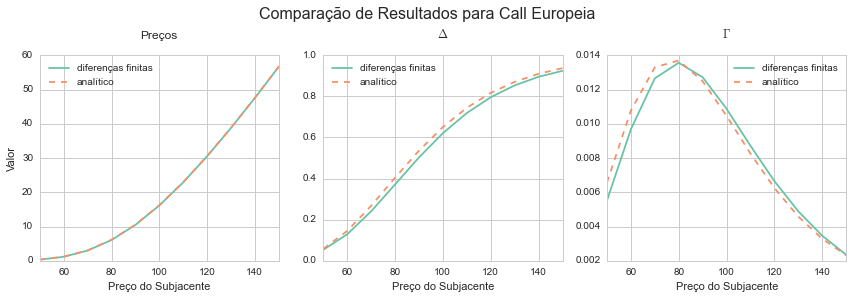

In [15]:
# plotando graficos do inicio do periodo
# plotando graficos do inicio do periodo
l_prices = np.arange(50., 151., 1.)
my_option.compare_to_analytical_solutions(l_prices, d_param['f_time'])

The charts above compare the solution using the implemented method and the analytical solution for an Europian call at the expirity. Now, let's introduce uncertain volatility. It is pretty simple. I just need to compare the current gamma and chose one of the values passed. Let's implement it.

In [16]:
reload(finite_difference)

<module 'finite_difference' from 'finite_difference.py'>

In [18]:
d_param = {"f_St": 100.,  # preco do ativo
           "f_sigma": 0.5, # the maximum volatility
           "f_time": .5,  # tempo para vencimento em anos
           "f_r": 0.10,  # taxa de juros anual
           "i_nas": 20,  # passos que o ativo sera discretizado
           "f_K": 100.,  # strike da opcao
           "f_sigmam": 0.25  # the minimum vol to be observed
          }

%time my_option = finite_difference.EuropianCall(**d_param)

CPU times: user 2.45 s, sys: 23.9 ms, total: 2.48 s
Wall time: 2.46 s


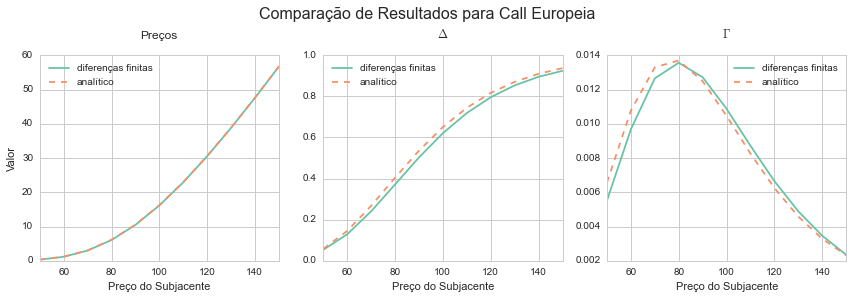

In [19]:
# plotando graficos do inicio do periodo
# plotando graficos do inicio do periodo
l_prices = np.arange(50., 151., 1.)
my_option.compare_to_analytical_solutions(l_prices, d_param['f_time'])

Well... any difference.... but if only should make some difference in cases where the Gamma change signal... so, let's try with a squared payoff

In [32]:
import finite_difference; reload(finite_difference);
d_param = {"f_St": 100.,  # preco do ativo
           "f_sigma": 1., # the maximum volatility
           "f_time": .5,  # tempo para vencimento em anos
           "f_r": 0.10,  # taxa de juros anual
           "i_nas": 20,  # passos que o ativo sera discretizado
           "f_K": 100.,  # strike da opcao
           "f_sigmam": 0.05  # the minimum vol to be observed
          }

%time my_option = finite_difference.SquaredLogContract(**d_param)

CPU times: user 7.94 s, sys: 133 ms, total: 8.07 s
Wall time: 7.98 s


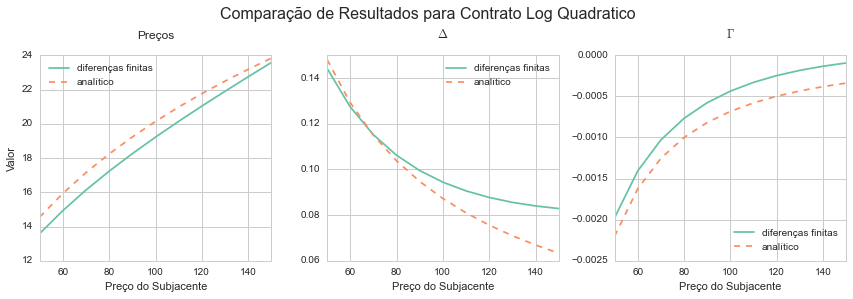

In [33]:
# plotando graficos do inicio do periodo
# plotando graficos do inicio do periodo
l_prices = np.arange(50., 151., 1.)
my_option.compare_to_analytical_solutions(l_prices, d_param['f_time'])

To comparition, let's plot without using UV

CPU times: user 2.14 s, sys: 45.6 ms, total: 2.19 s
Wall time: 2.17 s


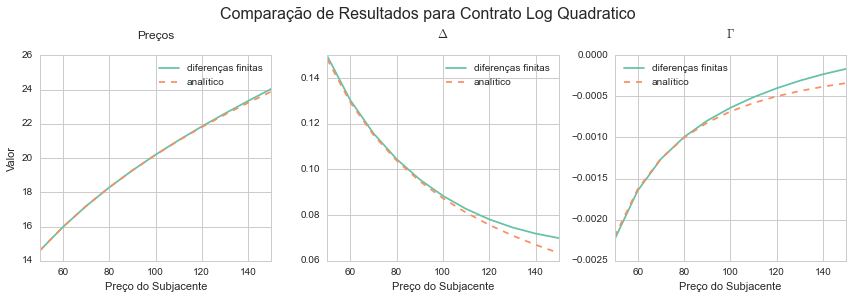

In [34]:
import finite_difference; reload(finite_difference);
d_param = {"f_St": 100.,  # preco do ativo
           "f_sigma": .5, # the maximum volatility
           "f_time": .5,  # tempo para vencimento em anos
           "f_r": 0.10,  # taxa de juros anual
           "i_nas": 20,  # passos que o ativo sera discretizado
           "f_K": 100.  # strike da opcao
          }

%time my_option = finite_difference.SquaredLogContract(**d_param)
l_prices = np.arange(50., 151., 1.)
my_option.compare_to_analytical_solutions(l_prices, d_param['f_time'])

.... Here we go. I would say that the option has a much lower price if I was using UVM than B&S. Now, let's use it to precify a butterfly.

CPU times: user 115 ms, sys: 4.93 ms, total: 120 ms
Wall time: 117 ms


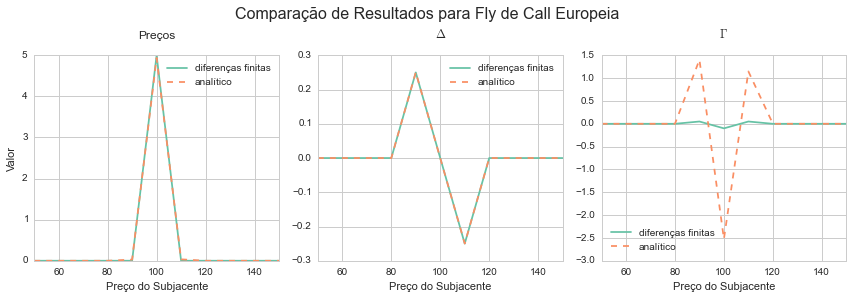

In [42]:
import finite_difference; reload(finite_difference);
d_param = {"f_St": 100.,  # preco do ativo
           "f_sigma": .5, # the maximum volatility
           "f_time": 10e-6,  # tempo para vencimento em anos
           "f_r": 0.10,  # taxa de juros anual
           "i_nas": 20,  # passos que o ativo sera discretizado
           "l_K": [90., 100., 110.],  # strike da opcao
           "l_Q": [.5, -1., .5]  # qty normalized of each leg
          }

%time my_option = finite_difference.EuropianCallButterfly(**d_param)
l_prices = np.arange(50., 151., 1.)
my_option.compare_to_analytical_solutions(l_prices, d_param['f_time'])

Nice.... now, with a lot of time to expiration

CPU times: user 3.47 s, sys: 32.6 ms, total: 3.5 s
Wall time: 3.52 s


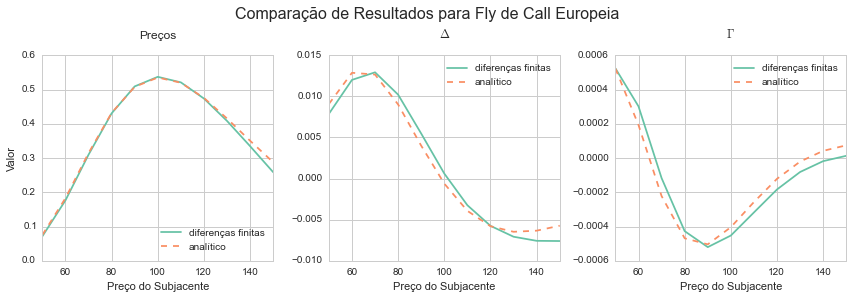

In [43]:
import finite_difference; reload(finite_difference);
d_param = {"f_St": 100.,  # preco do ativo
           "f_sigma": .5, # the maximum volatility
           "f_time": 0.5,  # tempo para vencimento em anos
           "f_r": 0.10,  # taxa de juros anual
           "i_nas": 20,  # passos que o ativo sera discretizado
           "l_K": [90., 100., 110.],  # strike da opcao
           "l_Q": [.5, -1., .5]  # qty normalized of each leg
          }

%time my_option = finite_difference.EuropianCallButterfly(**d_param)
l_prices = np.arange(50., 151., 1.)
my_option.compare_to_analytical_solutions(l_prices, d_param['f_time'])

Seriously?? well... assuming that it is correct, let's using UVM now

CPU times: user 4.19 s, sys: 32.2 ms, total: 4.22 s
Wall time: 4.24 s


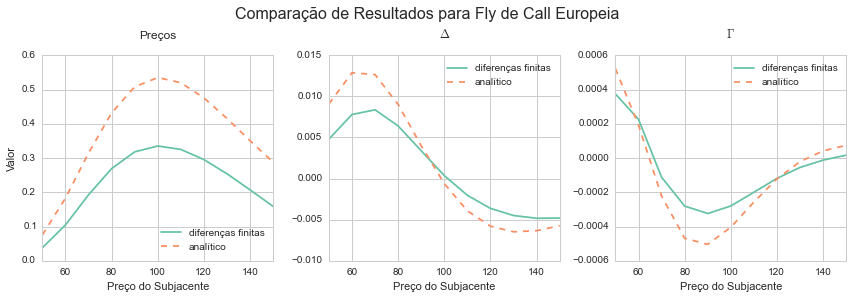

In [64]:
import finite_difference; reload(finite_difference);
d_param = {"f_St": 100.,  # preco do ativo
           "f_sigma": .55, # the maximum volatility
           "f_time": 0.5,  # tempo para vencimento em anos
           "f_r": 0.10,  # taxa de juros anual
           "i_nas": 20,  # passos que o ativo sera discretizado
           "l_K": [90., 100., 110.],  # strike da opcao
           "l_Q": [.5, -1., .5],  # qty normalized of each leg
           "f_sigmam": .45, # the minimum volatility
          }

%time my_option = finite_difference.EuropianCallButterfly(**d_param)
l_prices = np.arange(50., 151., 1.)
my_option.compare_to_analytical_solutions(l_prices, d_param['f_time'])

CPU times: user 4.18 s, sys: 36.7 ms, total: 4.22 s
Wall time: 4.24 s


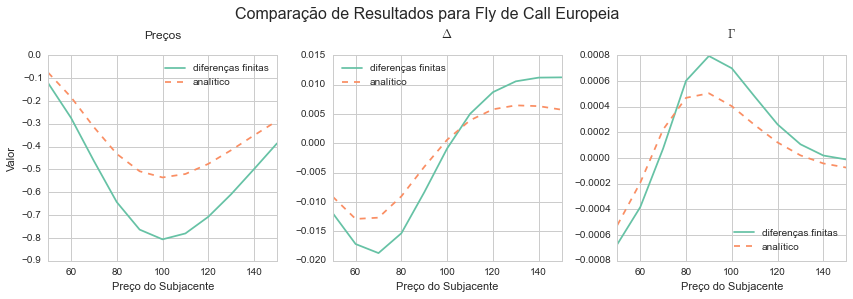

In [71]:
import finite_difference; reload(finite_difference);
d_param = {"f_St": 100.,  # preco do ativo
           "f_sigma": .55, # the maximum volatility
           "f_time": 0.5,  # tempo para vencimento em anos
           "f_r": 0.10,  # taxa de juros anual
           "i_nas": 20,  # passos que o ativo sera discretizado
           "l_K": [90., 100., 110.],  # strike da opcao
           "l_Q": [-.5, 1., -.5],  # qty normalized of each leg
           "f_sigmam": .45, # the minimum volatility
          }

%time my_option = finite_difference.EuropianCallButterfly(**d_param)
l_prices = np.arange(50., 151., 1.)
my_option.compare_to_analytical_solutions(l_prices, d_param['f_time'])

... well... something that teh value by B&S is 0.5 @ 100, by UV is 0.3 / 0.8 @100. I guess that it is working, but is not quite good to trade. Let's see what combination here would yiel the best bid/ask price to the strategy.

In [111]:
from scipy.optimize import basinhopping
from scipy.optimize import leastsq

In [103]:
def value_to_minimyze(x):
    d_param = {"f_St": 100.,  # preco do ativo
               "f_sigma": .55, # the maximum volatility
               "f_time": 0.5,  # tempo para vencimento em anos
               "f_r": 0.10,  # taxa de juros anual
               "i_nas": 20,  # passos que o ativo sera discretizado
               "l_K": [90., 100., 110.],  # strike da opcao
               "l_Q": [-x[0], 1., -x[1]],  # qty normalized of each leg
               "f_sigmam": .45, # the minimum volatility
              }

    my_option = finite_difference.EuropianCallButterfly(**d_param)    
    f_price_anlt = my_option.get_information(100., 0.5, "price_anlt")
    f_price = my_option.get_information(100., 0.5, "price")
    return (f_price_anlt - f_price)**2

def print_fun(x, f, accepted):
    print("at minimum %.4f accepted %d" % (f, int(accepted)))

In [104]:
value_to_minimyze([0.5, 0.5])

0.073517099665882352

In [116]:
import time
f_start = time.time()
l_aux = []
for f_x1 in [0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7, 0.9, 1., 1.1 ]:
    for f_x2 in [0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7, 0.9, 1., 1.1 ]:
        f_aux = value_to_minimyze([f_x1, f_x2])
        l_aux.append({'x1': f_x1, 'x1': f_x2, 'err': f_aux})
print "took {:0.2f} seconds to run".format(time.time() - f_start)

took 398.02 seconds to run


I know... pretty bad.  It is related to my implementation, that is not one of the best. But for now, it is good enought. Let's plot the resultd to check if there is a global minima here. Also... I'm not really sure if it is needed to loop like that... or I can just compute the prices and change the quantities

In [117]:
import pandas as pd

In [122]:
df = pd.DataFrame(l_aux)

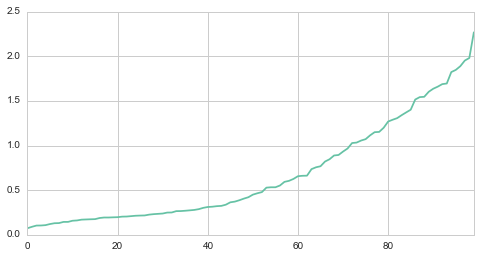

In [128]:
df.sort_values(by='err').reset_index(drop=True)['err'].plot()

It is bad

In [1]:
#loading style sheet
from IPython.core.display import HTML
HTML(open('ipython_style.css').read())

In [2]:
#changing matplotlib defaults
%matplotlib inline
import seaborn as sns
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})
sns.set_style("whitegrid")
sns.set_palette(sns.color_palette("Set2", 10))